In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.5f}'.format  # 지수로 표현 안되게
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

* pop_cd : cd 고유번호 L011: 지역번호(01:서울, 1:10대, 022:인천20대) Y:성별번호 Y80(80대 남자) 
* year : 년도 
* month : 월 
* avg_score : 신용점수  
* avg_rat:  신용등급 
* city : 도시  
* sex : 성별 
* ages : 나이대 
* population : pop_cd로 구분된 그룹에 포함된 고객인원 수/경제활동 인구수 
* num_opencard : 카드개설 개수 
* num_usecard : 사용카드 개수 
* monthly_card_spend :  카드 소비 금액 
* monthly_lc : 대출 약정 금액  
* monthly_loan : 대출 금액 합계  
* monthly_bk_loan : 은행대출 금액  
* monthly_cd_loan : 카드대출 금액   
* monthly_installments_loan : 할부 대출 금액 
* monthly_insurance_loan : 보험 대출 금액 
* monthly_sbk_loan : 저축은행 대출 금액 
* loan_commitment : 한도 대출 금액 (마이너스 통장) 
* inst_rep_loanb : 분할 상환 대출 금액  
* ls_rep_loanb : 일시 상환 대출 금액 
* credit_loan : 신용 대출 금액 
* mortgage_loan : 담보 대출 금액 
* credit_card_payment : 신용카드 사용 금액 
* credit_card_installments_payment : 신용카드 할부 사용 금액

##### dataset -> csv 저장

In [4]:
df=pd.read_csv('data/credit_card_dataset.csv',encoding='utf-8')
df_total=pd.read_csv('data/credit_card_dataset_total.csv',encoding='utf-8')
city_ages=pd.read_csv('data/credit_card_dataset_city.csv',encoding='utf-8')
sex_ages=pd.read_csv('data/credit_card_dataset_sex.csv',encoding='utf-8')
city_ages_total=pd.read_csv('data/credit_card_dataset_city_total.csv',encoding='utf-8')
sex_ages_total=pd.read_csv('data/credit_card_dataset_sex_total.csv',encoding='utf-8')

##### 시각화

In [5]:
city_loan = city_ages_total.groupby('city').sum()[['population', 'total_monthly_loan', 'total_monthly_bk_loan', 'total_monthly_cd_loan', 'total_monthly_installments_loan', 'total_monthly_insurance_loan','total_monthly_sbk_loan']]
city_loan['avg_loan'] = round(city_loan['total_monthly_loan']/city_loan['population'])
city_loan['avg_bk_loan'] = round(city_loan['total_monthly_bk_loan']/city_loan['population'])
city_loan['avg_cd_loan'] = round(city_loan['total_monthly_cd_loan']/city_loan['population'])
city_loan['avg_installments_loan'] = round(city_loan['total_monthly_installments_loan']/city_loan['population'])
city_loan['avg_insurance_loan'] = round(city_loan['total_monthly_insurance_loan']/city_loan['population'])
city_loan['avg_sbk_loan'] = round(city_loan['total_monthly_sbk_loan']/city_loan['population'])
city_loan = city_loan.sort_values(by='avg_loan')
city_loan.drop(['total_monthly_loan', 'total_monthly_bk_loan', 'total_monthly_cd_loan', 'total_monthly_installments_loan', 'total_monthly_insurance_loan','total_monthly_sbk_loan'], axis=1, inplace=True)
city_loan = city_loan.reset_index()

In [6]:
city_loan

,city,population,avg_loan,avg_bk_loan,avg_cd_loan,avg_installments_loan,avg_insurance_loan,avg_sbk_loan
0,전남,34052000,50373524.00000,35507704.00000,831215.00000,3433264.00000,1101931.00000,678006.00000
1,강원,28409000,54639070.00000,37836090.00000,877067.00000,4126896.00000,1429173.00000,828719.00000
2,전북,34838000,55488308.00000,38747132.00000,937717.00000,3503917.00000,2149409.00000,785259.00000
3,경북,51153000,60148476.00000,42865024.00000,896495.00000,3476530.00000,1704891.00000,790210.00000
4,충북,29803000,60509549.00000,38688870.00000,915449.00000,3958557.00000,2495717.00000,942527.00000
5,광주,29269000,60899047.00000,42806038.00000,1073751.00000,3437925.00000,1616188.00000,880338.00000
6,대전,30661000,63702993.00000,46528885.00000,1197325.00000,3327898.00000,2002769.00000,954078.00000
7,충남,40370000,66483783.00000,48703020.00000,984263.00000,4045506.00000,2256531.00000,1015917.00000
8,경남,65735000,67284482.00000,50694595.00000,1029748.00000,3811217.00000,2637612.00000,874200.00000
9,인천,59237000,67334135.00000,52044020.00000,1301990.00000,3710141.00000,3011771.00000,1084379.00000


지역별 loan 총합

<AxesSubplot:xlabel='city', ylabel='avg_loan'>

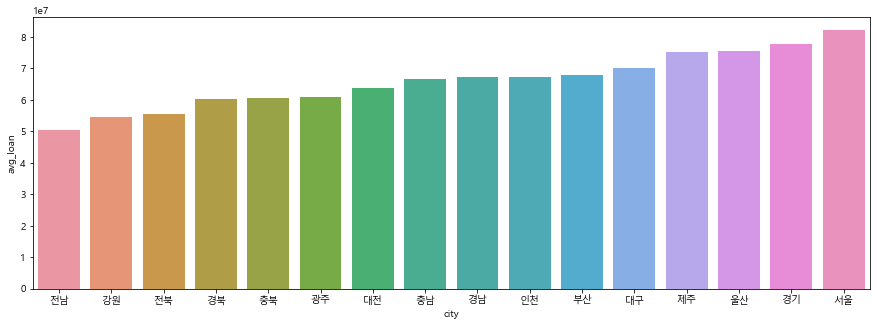

In [7]:
plt.figure(figsize=(15, 5))
sns.barplot(data=city_loan, x='city', y='avg_loan')

In [8]:
data = city_loan.drop(['population', 'avg_loan'], axis=1)
data = data.set_index('city')
data.columns.name = 'loan'
city = data.index

In [9]:
data

loan,avg_bk_loan,avg_cd_loan,avg_installments_loan,avg_insurance_loan,avg_sbk_loan
city,,,,,
전남,35507704.00000,831215.00000,3433264.00000,1101931.00000,678006.00000
강원,37836090.00000,877067.00000,4126896.00000,1429173.00000,828719.00000
전북,38747132.00000,937717.00000,3503917.00000,2149409.00000,785259.00000
경북,42865024.00000,896495.00000,3476530.00000,1704891.00000,790210.00000
충북,38688870.00000,915449.00000,3958557.00000,2495717.00000,942527.00000
광주,42806038.00000,1073751.00000,3437925.00000,1616188.00000,880338.00000
대전,46528885.00000,1197325.00000,3327898.00000,2002769.00000,954078.00000
충남,48703020.00000,984263.00000,4045506.00000,2256531.00000,1015917.00000
경남,50694595.00000,1029748.00000,3811217.00000,2637612.00000,874200.00000


지역별 loan 종류

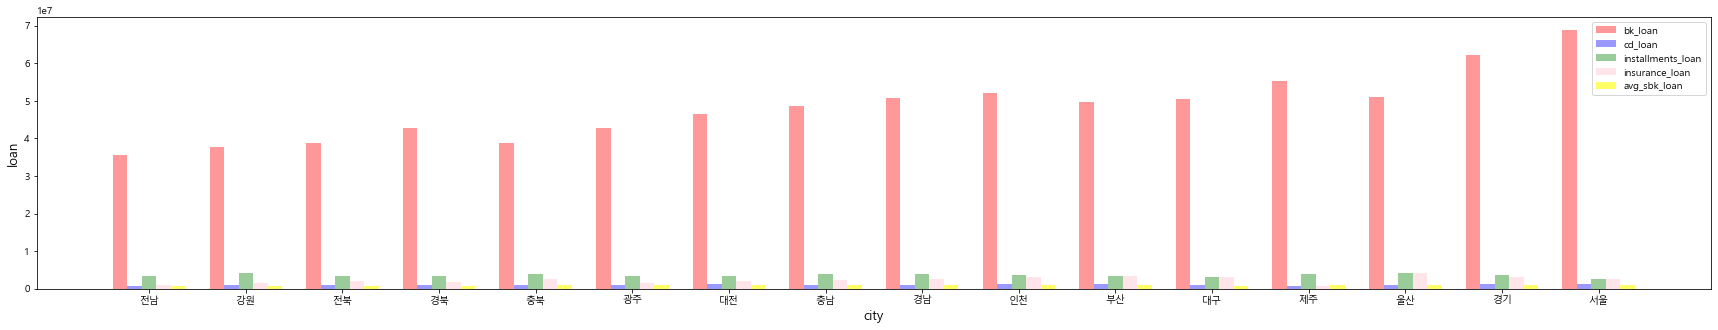

In [10]:
fig, ax = plt.subplots(figsize=(30,5))
bar_width = 0.15
index = np.arange(16)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index - bar_width, data['avg_bk_loan'], bar_width, alpha=0.4, color='red', label='bk_loan')

b2 = plt.bar(index, data['avg_cd_loan'], bar_width, alpha=0.4, color='blue', label='cd_loan')

b3 = plt.bar(index + bar_width, data['avg_installments_loan'], bar_width, alpha=0.4, color='green', label='installments_loan')

b4 = plt.bar(index + 2* bar_width, data['avg_insurance_loan'], bar_width, alpha=0.4, color='pink', label='insurance_loan')

b5 = plt.bar(index + 3 * bar_width, data['avg_sbk_loan'], bar_width, alpha=0.6, color='yellow', label='avg_sbk_loan')
# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 16 + bar_width, 1), city)

# x축, y축 이름 및 범례 설정
plt.xlabel('city', size = 13)
plt.ylabel('loan', size = 13)
plt.legend()
plt.show()

지역별 loan 종류 (bk 제외)

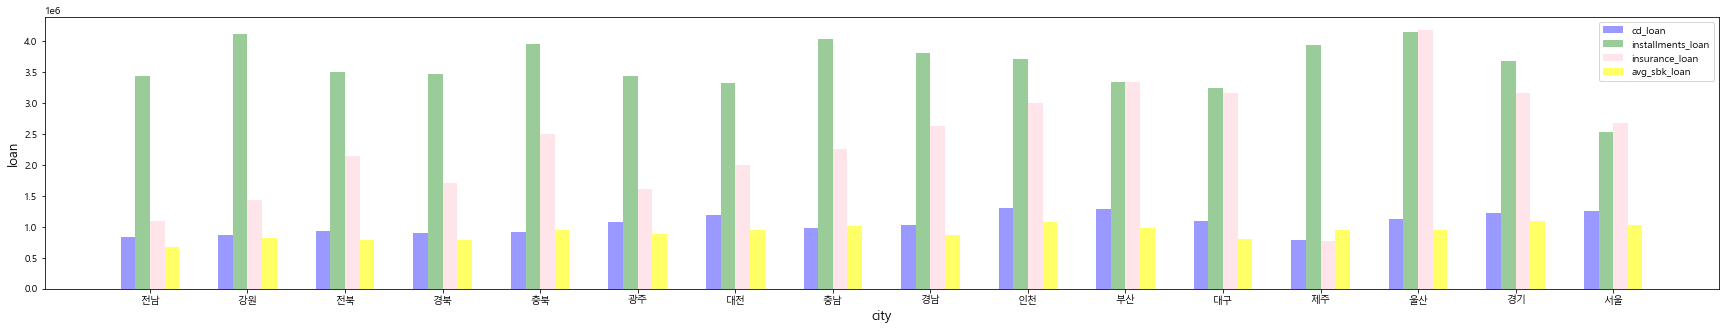

In [11]:
fig, ax = plt.subplots(figsize=(30,5))
bar_width = 0.15
index = np.arange(16)


b2 = plt.bar(index -bar_width, data['avg_cd_loan'], bar_width, alpha=0.4, color='blue', label='cd_loan')

b3 = plt.bar(index, data['avg_installments_loan'], bar_width, alpha=0.4, color='green', label='installments_loan')

b4 = plt.bar(index + bar_width, data['avg_insurance_loan'], bar_width, alpha=0.4, color='pink', label='insurance_loan')

b5 = plt.bar(index + 2*bar_width, data['avg_sbk_loan'], bar_width, alpha=0.6, color='yellow', label='avg_sbk_loan')

plt.xticks(np.arange(bar_width/2, 16 + bar_width/2, 1), city)

plt.xlabel('city', size = 13)
plt.ylabel('loan', size = 13)
plt.legend()
plt.show()

In [12]:
new_avg_df = city_ages_total.groupby('new_avg_rat').sum().divide(city_ages_total.groupby('new_avg_rat').sum()['population'],axis=0)
# new_avg_df.reset_index(inplace=True)
# new_avg_df.set_index('new_avg_rat')
new_avg_df.columns.name = 'new'
# city = data.index

In [13]:
new_avg_df

new,year,month,avg_score,avg_rat,monthly_spend_rat,population,total_avg_score,total_avg_rat,total_new_avg_rat,total_monthly_spend_rat,...,total_monthly_sbk_loan,total_loan_commitment,total_inst_rep_loanb,total_ls_rep_loanb,total_credit_loan,total_mortgage_loan,total_credit_card_payment,total_credit_card_installments_payment,total_debit_card_payment,total_monthly_spend
new_avg_rat,,,,,,,,,,,,,,,,,,,,,
1,0.00622,0.00002,0.00256,0.00001,0.00001,1.00000,831.57803,3.00000,1.00000,3.28686,...,554808.16828,15550430.41456,28802951.81534,40048959.53893,22504880.37214,115669925.68971,516955.79415,185547.33917,221491.89316,738447.68731
2,0.00894,0.00003,0.00362,0.00001,0.00002,1.00000,817.65081,3.00000,2.00000,2.70925,...,629804.09647,15418570.48194,26508365.23350,31935075.90624,25554090.10203,100764794.11440,683707.22362,207895.79564,291160.52875,974867.75238
3,0.00362,0.00001,0.00145,0.00001,0.00000,1.00000,804.93570,2.99764,3.00000,1.66685,...,1010192.62969,13100461.46315,36231337.02712,31356375.23814,29632676.39273,108023150.67084,906763.84935,275493.66579,401846.70069,1308610.55005
4,0.00498,0.00002,0.00195,0.00001,0.00000,1.00000,791.88796,3.07853,4.00000,1.73773,...,1057418.05491,11999480.92136,29503822.14984,28045468.12471,27361856.11913,90801467.56631,821057.17078,260656.39367,436608.58539,1257665.75617
5,0.00497,0.00001,0.00190,0.00001,0.00001,1.00000,771.62179,3.92862,5.00000,2.83213,...,1378074.08197,5710717.83417,18414919.68970,15721358.27757,19489812.87189,53331929.20830,421685.09370,136535.00658,446153.63690,867838.73061


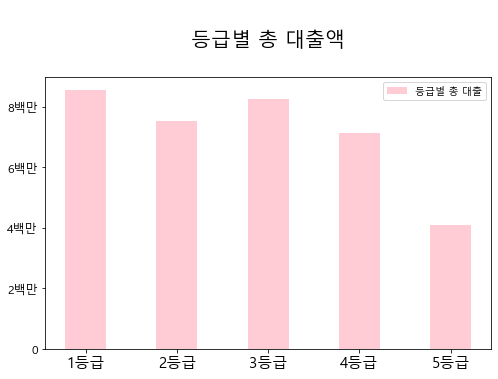

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
bar_width = 0.45
index = new_avg_df.index

plt.bar(index, new_avg_df['total_monthly_loan'], bar_width, alpha=0.8, color='pink', label='등급별 총 대출')
# plt.ylim(600,900)
plt.yticks([0,20000000,40000000,60000000,80000000],['0', '2백만', '4백만', '6백만', '8백만'],size = 12)
plt.title('\n등급별 총 대출액\n',size=20)
plt.xticks([1, 2, 3, 4, 5], ['1등급', '2등급', '3등급', '4등급', '5등급'], size = 15, color = 'k')
plt.legend()
plt.show()

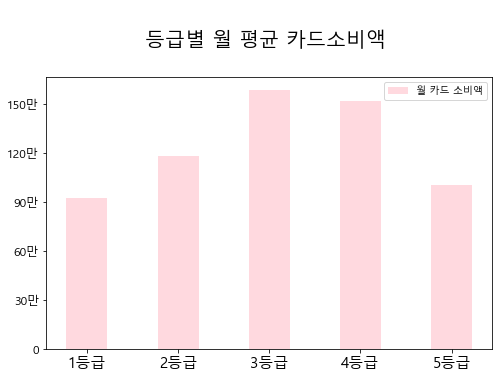

In [15]:
fig, ax = plt.subplots(figsize=(8,5))
bar_width = 0.45
index = new_avg_df.index

plt.bar(index, new_avg_df['total_monthly_card_spend'], bar_width, alpha=0.6, color='pink', label='월 카드 소비액')
# plt.ylim(new_avg_df['total_monthly_card_spend'].min(),new_avg_df['total_monthly_card_spend'].max())
plt.yticks([0,300000,600000,900000,1200000,1500000],['0','30만','60만','90만','120만','150만'],size = 12)
# plt.yticks('manual')
plt.title('\n등급별 월 평균 카드소비액 \n',size = 20)
# plt.xticks([["1등급","2등급","3등급","4등급","5등급"])
plt.xticks([1, 2, 3, 4, 5], ['1등급', '2등급', '3등급', '4등급', '5등급'], size = 15, color = 'k')
plt.legend()
plt.show()  #단위 십만!

In [16]:
new_avg_df = city_ages_total.groupby('new_avg_rat').sum().divide(city_ages_total.groupby('new_avg_rat').sum()['population'],axis=0)
# new_avg_df.reset_index(inplace=True)
# new_avg_df.set_index('new_avg_rat')
new_avg_df.columns.name = 'new'
# city = data.index

In [17]:
new_sex_df=sex_ages_total.groupby(['sex','new_avg_rat']).sum().divide(sex_ages_total.groupby(['sex','new_avg_rat']).sum()['population'],axis=0)
M_g=new_sex_df.iloc[0:4,:]
M_g.reset_index(inplace=True)
M_g.drop('sex',axis=1,inplace=True)

In [18]:
F_g=new_sex_df.iloc[4:,:]
F_g.reset_index(inplace=True)
F_g.drop('sex',axis=1,inplace=True)

In [19]:
M_g

,new_avg_rat,year,month,avg_score,avg_rat,monthly_spend_rat,population,total_avg_score,total_avg_rat,total_new_avg_rat,...,total_monthly_sbk_loan,total_loan_commitment,total_inst_rep_loanb,total_ls_rep_loanb,total_credit_loan,total_mortgage_loan,total_credit_card_payment,total_credit_card_installments_payment,total_debit_card_payment,total_monthly_spend
0,1,0.00151,0.00001,0.00062,0.00000,0.00000,1.00000,833.23644,3.00000,1.00000,...,230579.38728,17607238.51958,18557020.13139,41667699.85040,17324297.35267,106546611.16170,272750.94315,91799.69429,116452.35462,389203.29778
1,2,0.00064,0.00000,0.00026,0.00000,0.00000,1.00000,819.47676,3.00000,2.00000,...,427454.56305,20702154.71370,28177595.26212,40693412.57446,24177644.32712,122011138.44623,600055.09101,183410.47365,240842.06598,840897.15699
2,4,0.00043,0.00000,0.00017,0.00000,0.00000,1.00000,788.48085,3.00000,4.00000,...,1235985.87064,14978706.99196,36652659.41829,32778333.06984,35325782.87402,104036183.13059,1040439.15748,245049.69668,444949.34570,1485388.50318
3,5,0.00045,0.00000,0.00017,0.00000,0.00000,1.00000,773.14466,3.85801,5.00000,...,1228143.40622,11707904.83568,28253871.52519,24908093.86186,28097898.36597,81026599.14617,701667.82724,177550.45735,437260.15042,1138927.97766


In [20]:
new_sex_df.columns

Index(['year', 'month', 'avg_score', 'avg_rat', 'monthly_spend_rat',
       'population', 'total_avg_score', 'total_avg_rat', 'total_new_avg_rat',
       'total_monthly_spend_rat', 'total_num_opencard', 'total_num_usecard',
       'total_monthly_card_spend', 'total_monthly_lc', 'total_monthly_loan',
       'total_monthly_bk_loan', 'total_monthly_cd_loan',
       'total_monthly_installments_loan', 'total_monthly_insurance_loan',
       'total_monthly_sbk_loan', 'total_loan_commitment',
       'total_inst_rep_loanb', 'total_ls_rep_loanb', 'total_credit_loan',
       'total_mortgage_loan', 'total_credit_card_payment',
       'total_credit_card_installments_payment', 'total_debit_card_payment',
       'total_monthly_spend'],
      dtype='object')

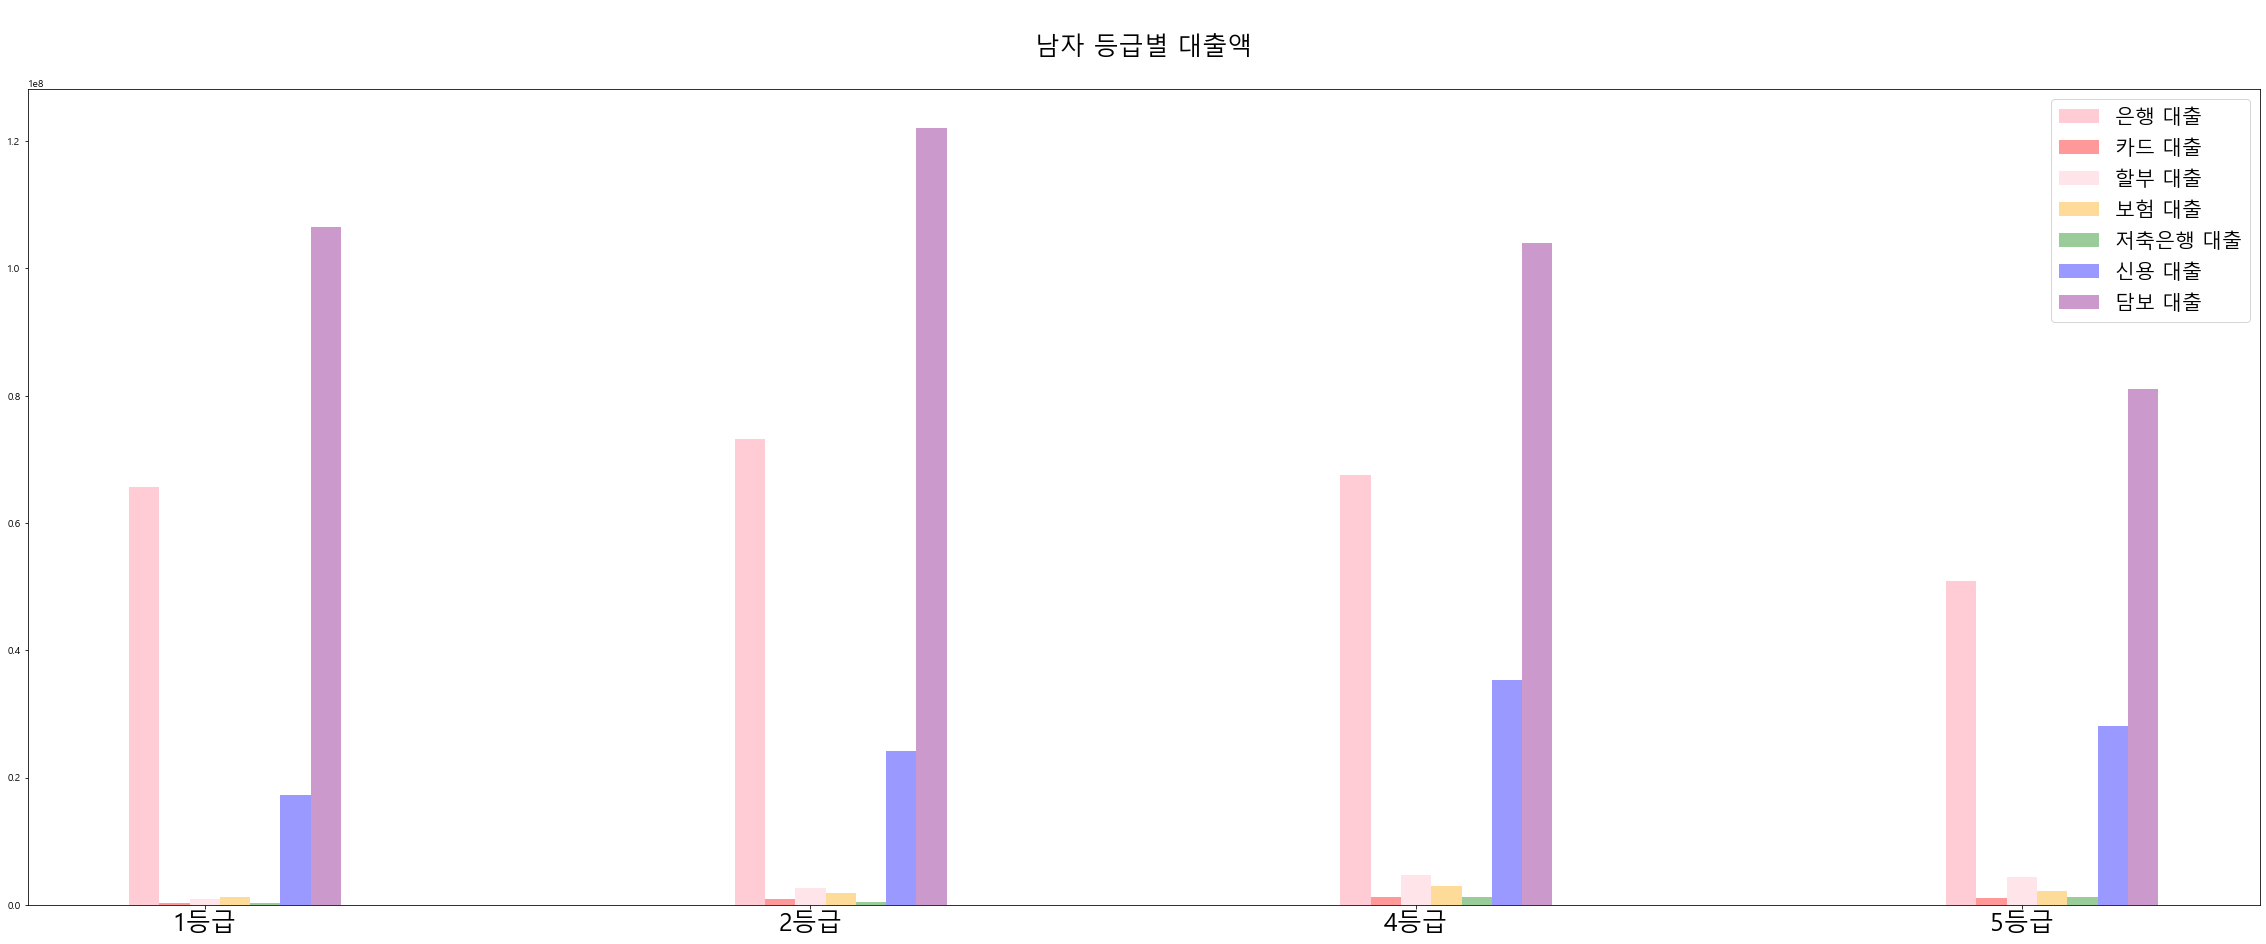

In [21]:
fig, ax = plt.subplots(figsize=(40,15))
bar_width = 0.05
index = M_g.index

plt.bar(index - 2*bar_width, M_g['total_monthly_bk_loan'], bar_width, alpha=0.8, color='pink', label='은행 대출')

plt.bar(index - bar_width, M_g['total_monthly_cd_loan'], bar_width, alpha=0.4, color='red', label='카드 대출')

plt.bar(index, M_g['total_monthly_installments_loan'], bar_width, alpha=0.4, color='pink', label='할부 대출')

plt.bar(index + bar_width, M_g['total_monthly_insurance_loan'], bar_width, alpha=0.4, color='orange', label='보험 대출')

plt.bar(index + 2*bar_width, M_g['total_monthly_sbk_loan'], bar_width, alpha=0.4, color='green', label='저축은행 대출')

plt.bar(index + 3*bar_width, M_g['total_credit_loan'], bar_width, alpha=0.4, color='blue', label='신용 대출')

plt.bar(index + 4*bar_width, M_g['total_mortgage_loan'], bar_width, alpha=0.4, color='purple', label='담보 대출')
plt.xticks([0, 1, 2, 3], ['1등급', '2등급', '4등급', '5등급'], size = 25, color = 'k')

plt.title('\n 남자 등급별 대출액 \n',fontsize=25)

# plt.ylim(600,900)][oi]
plt.legend(fontsize=20)
plt.show()

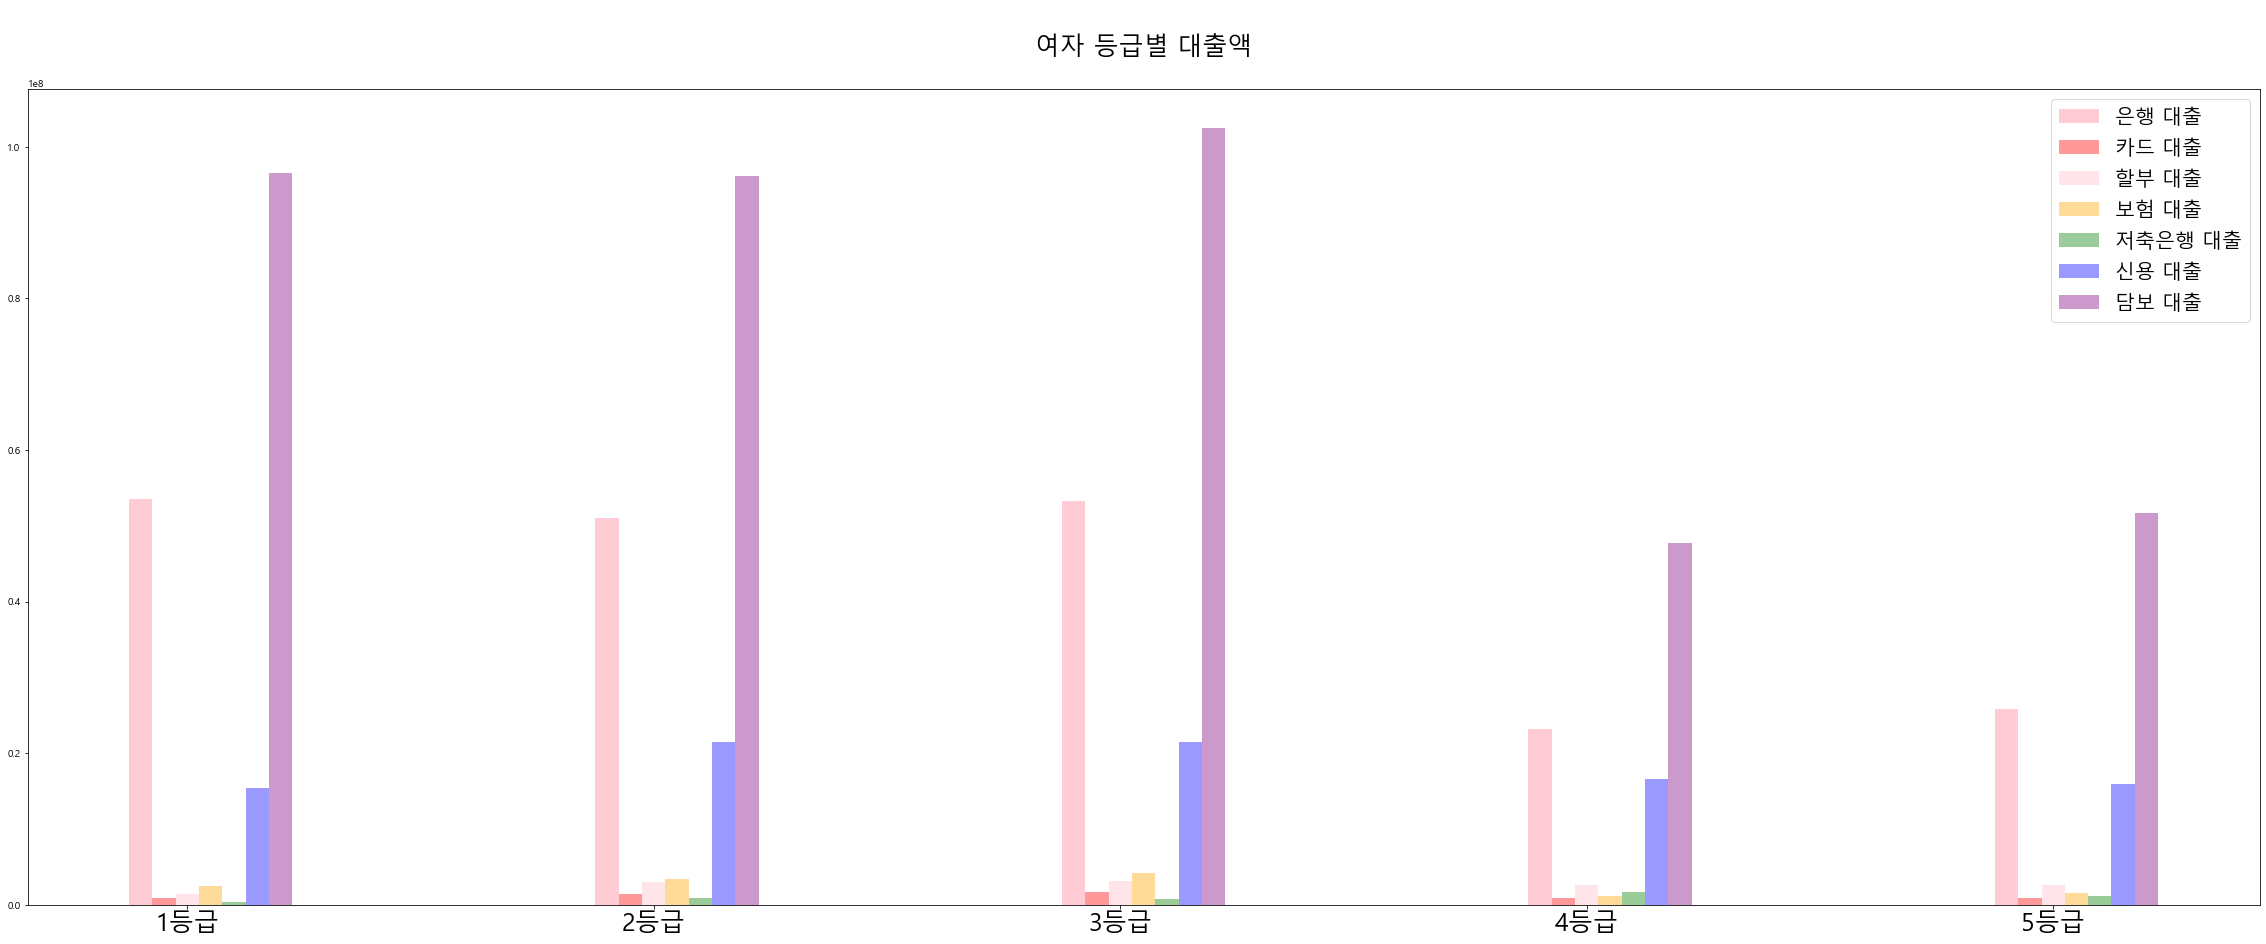

In [22]:
fig, ax = plt.subplots(figsize=(40,15))
bar_width = 0.05
index = F_g.index

plt.bar(index - 2*bar_width, F_g['total_monthly_bk_loan'], bar_width, alpha=0.8, color='pink', label='은행 대출')

plt.bar(index - bar_width, F_g['total_monthly_cd_loan'], bar_width, alpha=0.4, color='red', label='카드 대출')

plt.bar(index, F_g['total_monthly_installments_loan'], bar_width, alpha=0.4, color='pink', label='할부 대출')

plt.bar(index + bar_width, F_g['total_monthly_insurance_loan'], bar_width, alpha=0.4, color='orange', label='보험 대출')

plt.bar(index + 2*bar_width, F_g['total_monthly_sbk_loan'], bar_width, alpha=0.4, color='green', label='저축은행 대출')

plt.bar(index + 3*bar_width, F_g['total_credit_loan'], bar_width, alpha=0.4, color='blue', label='신용 대출')

plt.bar(index + 4*bar_width, F_g['total_mortgage_loan'], bar_width, alpha=0.4, color='purple', label='담보 대출')
plt.xticks([0, 1, 2, 3, 4], ['1등급', '2등급','3등급' ,'4등급', '5등급'], size = 25, color = 'k')

plt.title('\n 여자 등급별 대출액 \n',fontsize=25)

# plt.ylim(600,900)][oi]
plt.legend(fontsize=20)
plt.show()

<AxesSubplot:>

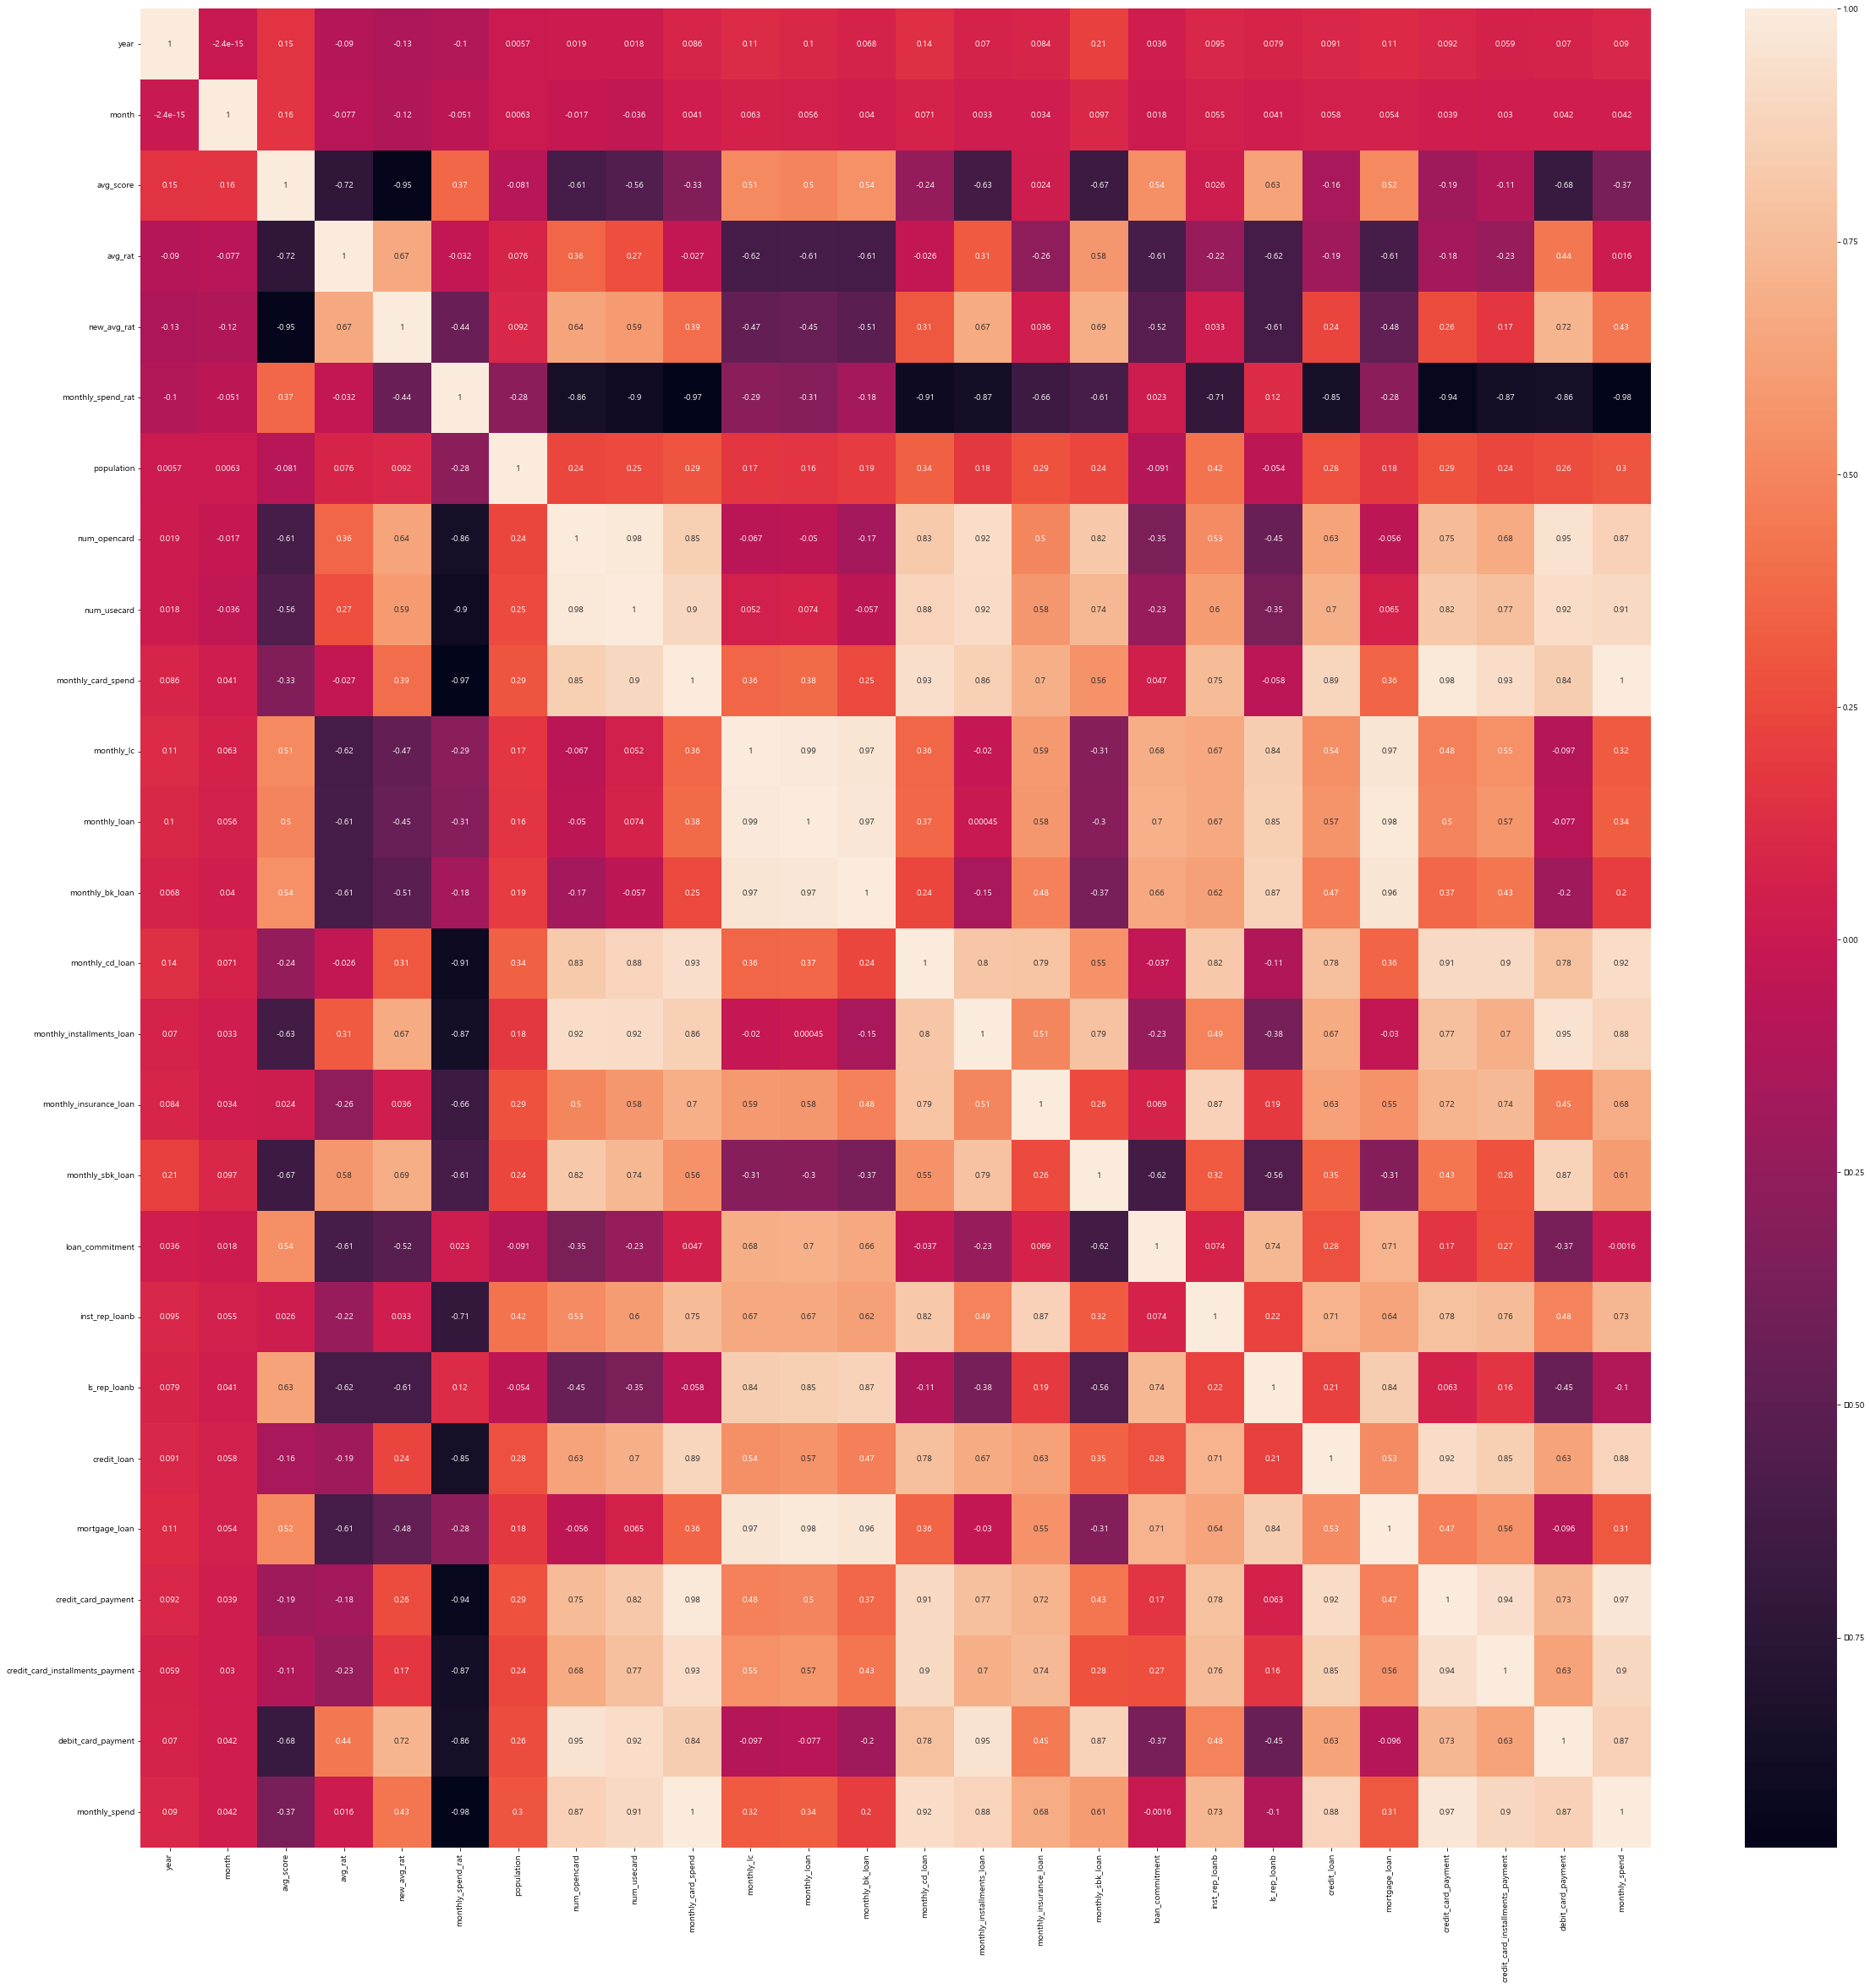

In [23]:
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(df.corr(), annot = True)

In [24]:
df[['monthly_card_spend','monthly_spend']]

,monthly_card_spend,monthly_spend
0,810000,727000
1,790000,707000
2,790000,712000
3,860000,771000
4,820000,738000
...,...,...
3019,200000,157000
3020,190000,151000
3021,210000,161000
3022,200000,156000


In [25]:
df.columns

Index(['pop_cd', 'year', 'month', 'avg_score', 'avg_rat', 'new_avg_rat',
       'city', 'sex', 'ages', 'monthly_spend_rat', 'population',
       'num_opencard', 'num_usecard', 'monthly_card_spend', 'monthly_lc',
       'monthly_loan', 'monthly_bk_loan', 'monthly_cd_loan',
       'monthly_installments_loan', 'monthly_insurance_loan',
       'monthly_sbk_loan', 'loan_commitment', 'inst_rep_loanb', 'ls_rep_loanb',
       'credit_loan', 'mortgage_loan', 'credit_card_payment',
       'credit_card_installments_payment', 'debit_card_payment',
       'monthly_spend', 'date'],
      dtype='object')

In [26]:
cor_df = df.drop(['avg_rat','monthly_lc','monthly_card_spend','monthly_loan','new_avg_rat','num_opencard','monthly_spend_rat','credit_card_payment','debit_card_payment','population'],axis=1)

In [27]:
cor_df.to_csv('drop_df.csv')

<AxesSubplot:>

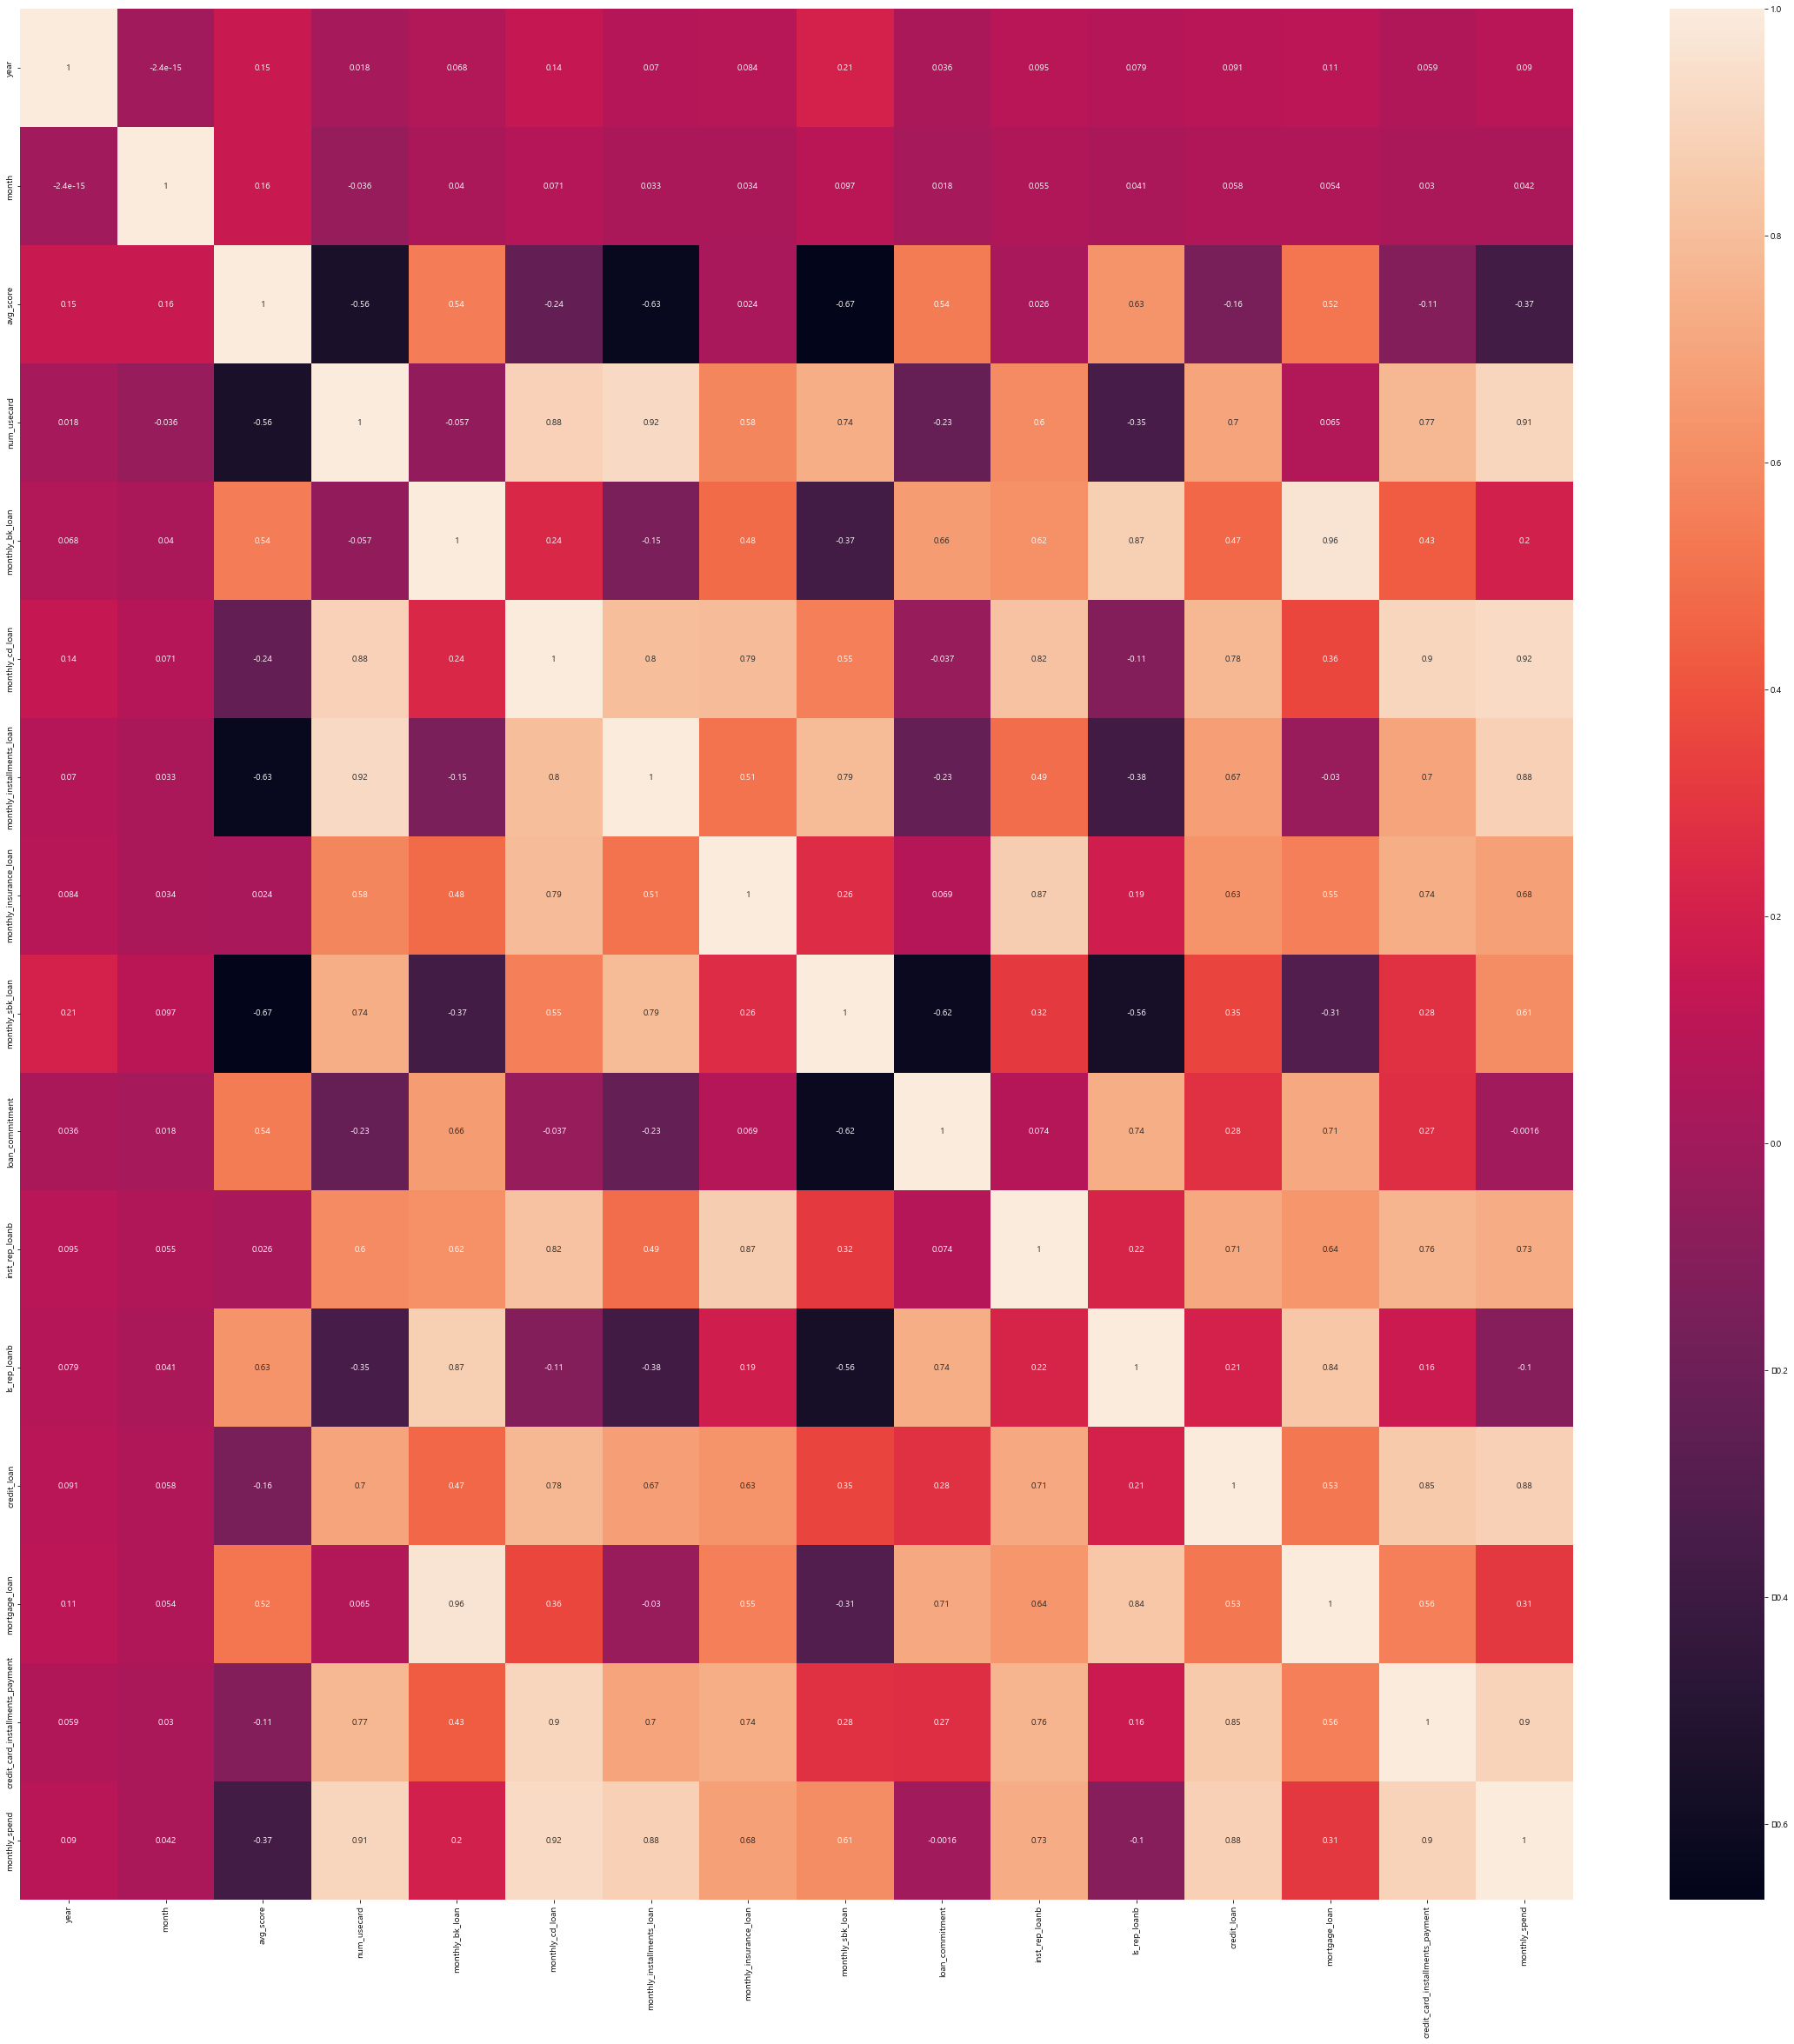

In [28]:
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(cor_df.corr(), annot = True)

In [29]:
dfdf = pd.read_csv('data/gmm_clustering.csv')

In [30]:
dfdf

,avg_score,num_usecard,monthly_card_spend,monthly_bk_loan,monthly_cd_loan,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,...,monthly_spend,cluster,city,ages,sex,avg_rat,monthly_loan,credit_card_payment,debit_card_payment,monthly_spend.1
0,740,1.99000,810000,18500000,620000,2110000,680000,1320000,3800000,10520000,...,727000,2,서울,20대,NaN,4,24940000,254000,473000,727000
1,782,1.75000,790000,24150000,680000,2300000,790000,1160000,5420000,12220000,...,707000,2,서울,20대,NaN,4,30880000,278000,429000,707000
2,782,1.74000,790000,24240000,680000,2300000,790000,1210000,5350000,12280000,...,712000,2,서울,20대,NaN,4,31000000,267000,445000,712000
3,782,1.75000,860000,24570000,680000,2300000,790000,1230000,5380000,12320000,...,771000,2,서울,20대,NaN,4,31390000,292000,479000,771000
4,781,1.75000,820000,24830000,700000,2320000,770000,1250000,5430000,12420000,...,738000,2,서울,20대,NaN,4,31730000,285000,453000,738000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,818,0.18000,200000,58460000,230000,260000,1610000,290000,8600000,18710000,...,157000,0,NaN,80대,여자,3,69610000,82000,75000,157000
3020,818,0.18000,190000,58330000,230000,270000,1610000,310000,8550000,18750000,...,151000,0,NaN,80대,여자,3,69500000,82000,69000,151000
3021,818,0.18000,210000,58190000,240000,290000,1610000,430000,8630000,18760000,...,161000,0,NaN,80대,여자,3,69510000,87000,74000,161000
3022,819,0.18000,200000,58420000,240000,300000,1610000,470000,8570000,18690000,...,156000,0,NaN,80대,여자,3,69750000,80000,76000,156000


In [31]:
dfdf[dfdf['city'].isna()==False]

,avg_score,num_usecard,monthly_card_spend,monthly_bk_loan,monthly_cd_loan,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,...,monthly_spend,cluster,city,ages,sex,avg_rat,monthly_loan,credit_card_payment,debit_card_payment,monthly_spend.1
0,740,1.99000,810000,18500000,620000,2110000,680000,1320000,3800000,10520000,...,727000,2,서울,20대,NaN,4,24940000,254000,473000,727000
1,782,1.75000,790000,24150000,680000,2300000,790000,1160000,5420000,12220000,...,707000,2,서울,20대,NaN,4,30880000,278000,429000,707000
2,782,1.74000,790000,24240000,680000,2300000,790000,1210000,5350000,12280000,...,712000,2,서울,20대,NaN,4,31000000,267000,445000,712000
3,782,1.75000,860000,24570000,680000,2300000,790000,1230000,5380000,12320000,...,771000,2,서울,20대,NaN,4,31390000,292000,479000,771000
4,781,1.75000,820000,24830000,700000,2320000,770000,1250000,5430000,12420000,...,738000,2,서울,20대,NaN,4,31730000,285000,453000,738000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,804,0.27000,170000,60420000,90000,180000,2950000,0,13310000,7630000,...,141000,0,제주,80대,NaN,3,72040000,82000,59000,141000
2972,802,0.27000,140000,61450000,90000,190000,2890000,0,13160000,7640000,...,117000,0,제주,80대,NaN,3,72710000,74000,43000,117000
2973,802,0.27000,170000,63420000,90000,190000,2840000,30000,14500000,7630000,...,133000,0,제주,80대,NaN,3,74490000,82000,51000,133000
2974,802,0.27000,160000,64170000,90000,190000,2820000,110000,14670000,8020000,...,132000,0,제주,80대,NaN,3,75390000,74000,58000,132000


In [32]:
cluster_mean = dfdf.groupby('cluster').mean()

In [33]:
cluster_mean.reset_index(inplace=True)
cluster_mean

,cluster,avg_score,num_usecard,monthly_card_spend,monthly_bk_loan,monthly_cd_loan,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,...,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_installments_payment,monthly_spend,avg_rat,monthly_loan,credit_card_payment,debit_card_payment,monthly_spend.1
0,0,825.71586,0.52196,371519.82379,60881872.24670,291828.19383,616674.00881,1552863.43612,228656.38767,14235484.58150,...,43131960.35242,16409647.57709,95174735.68282,80418.50220,291101.32159,2.99780,75079867.84141,187310.57269,103790.74890,291101.32159
1,1,793.69078,2.18490,1623508.13743,45346708.86076,1323273.05606,4749909.58409,2808010.84991,1167830.01808,10621916.81736,...,24526112.11573,27582893.30922,80646618.44485,260956.60036,1362551.53707,3.11573,63906274.86438,907949.36709,454602.16998,1362551.53707
2,2,770.55787,1.78613,788888.88889,18667615.74074,699907.40741,3828472.22222,889537.03704,1611458.33333,3533055.55556,...,11676527.77778,16360833.33333,38640555.55556,84115.74074,704773.14815,4.00000,29305115.74074,255993.05556,448780.09259,704773.14815
3,3,796.64392,1.84567,1492967.35905,58922611.27596,1121038.57567,3940712.16617,2275816.02374,676468.84273,18503471.81009,...,38218516.32047,29527833.82789,104908367.95252,289077.15134,1203890.20772,3.07715,81926320.47478,820216.61721,383673.59050,1203890.20772
4,4,814.95467,0.44608,247653.33333,38578240.00000,142933.33333,496160.00000,455173.33333,110053.33333,13005626.66667,...,26295520.00000,13231840.00000,64361200.00000,49413.33333,198240.00000,3.00000,48286266.66667,117557.33333,80682.66667,198240.00000
5,5,800.98280,2.12007,1657641.27764,64351769.04177,1539287.46929,3938378.37838,4293488.94349,986707.61671,12403292.38329,...,31111621.62162,28839238.32924,110511400.49140,300560.19656,1357081.08108,3.10811,84173046.68305,932842.75184,424238.32924,1357081.08108
6,6,822.25322,1.30968,860815.45064,59266845.49356,831330.47210,2162789.69957,1846223.17597,342296.13734,17741652.36052,...,36566802.57511,20806309.01288,104771287.55365,190697.42489,670118.02575,2.99785,77261781.11588,463630.90129,206487.12446,670118.02575


In [34]:
import seaborn as sns

Text(0.5, 1.0, 'cluster 별 신용점수 평균')

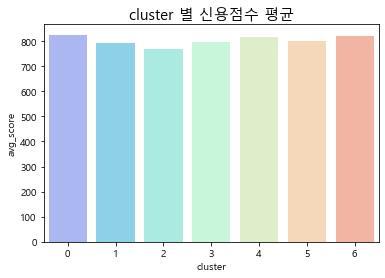

In [35]:

a=sns.barplot(x='cluster', y='avg_score', data=cluster_mean, palette='rainbow',alpha=0.5)
a.set_title("cluster 별 신용점수 평균", fontsize=15)

In [36]:
cluster_0=dfdf[dfdf['cluster']==0]
cluster_1=dfdf[dfdf['cluster']==1]
cluster_2=dfdf[dfdf['cluster']==2]
cluster_3=dfdf[dfdf['cluster']==3]
cluster_4=dfdf[dfdf['cluster']==4]
cluster_5=dfdf[dfdf['cluster']==5]
cluster_6=dfdf[dfdf['cluster']==6]

In [37]:
data_ = pd.concat([cluster_0[['avg_score','cluster']],cluster_1[['avg_score','cluster']],cluster_2[['avg_score','cluster']],
           cluster_3[['avg_score','cluster']],cluster_4[['avg_score','cluster']],cluster_5[['avg_score','cluster']],
           cluster_6[['avg_score','cluster']]],axis=0)

(array([700., 720., 740., 760., 780., 800., 820., 840., 860.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

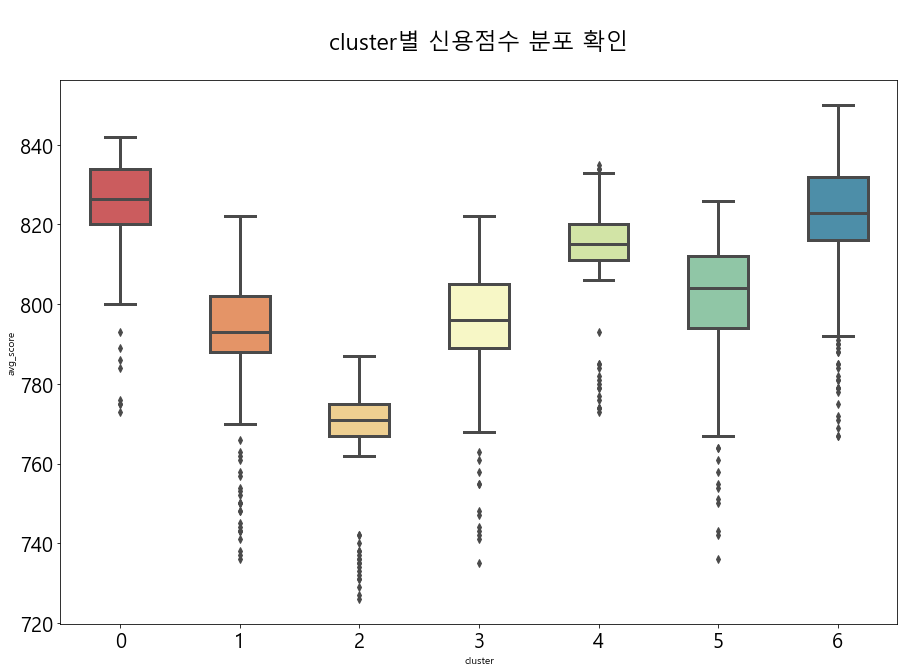

In [38]:
plt.figure(figsize=(15,10))
b = sns.boxplot(x='cluster', y ='avg_score', data=data_ , palette='Spectral', linewidth = 3,width = 0.5) 
b.set_title('\ncluster별 신용점수 분포 확인\n',fontsize=23)
# sns.boxplot(x='cluster', y ='avg_score', data=cluster_1) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# sns.set(font_scale = 2)

In [39]:
df_total_age = df_total.groupby('ages').sum().divide(df_total.groupby('ages')['population'].sum(),axis=0)
df_total_age.drop(['avg_score', 'avg_rat', 'population'], axis=1, inplace=True)

In [40]:
df_loan=df_total_age[['total_monthly_bk_loan','total_monthly_cd_loan','total_monthly_installments_loan','total_monthly_insurance_loan','total_monthly_sbk_loan','total_credit_loan','total_mortgage_loan']]
df_loan

,total_monthly_bk_loan,total_monthly_cd_loan,total_monthly_installments_loan,total_monthly_insurance_loan,total_monthly_sbk_loan,total_credit_loan,total_mortgage_loan
ages,,,,,,,
20대,20829782.44643,723211.16428,3499038.73685,922289.08918,1585728.14020,17232311.51020,40902839.30949
30대,50908604.37708,1335907.97119,4189921.99311,2795822.83984,1253014.10886,29522758.64234,85686021.31061
40대,63298453.23159,1623595.65858,4306211.32860,4050583.86760,1102961.70773,30625594.20328,106459259.43650
50대,68276765.16668,1328338.56710,3516682.44039,3440651.88404,746873.69203,28199677.07702,116271985.36223
60대,64623910.28280,974018.56467,2199597.46451,2308727.88673,411595.04461,20786917.86759,113004978.47365
70대,59423796.89045,421346.46507,895630.44313,1505441.40150,266294.04097,16261912.20458,96807866.26029
80대,62163512.88548,148373.53642,296533.43928,1318431.70472,232923.25683,15249962.07067,92482834.35528


In [41]:
ages = ['20대', '30대', '40대', '50대', '60대', '70대', '80대']
df_loan.insert(0,'ages',ages)
df_loan.reset_index(drop=True,inplace=True)

In [42]:
df_loan2 = df_loan.drop(['total_monthly_bk_loan','total_mortgage_loan'],axis=1)

In [43]:
df_loan.columns=['ages','은행','카드','할부','보험','저축은행','신용','담보']
df_loan2.columns=['ages','카드','할부','보험','저축은행','신용']

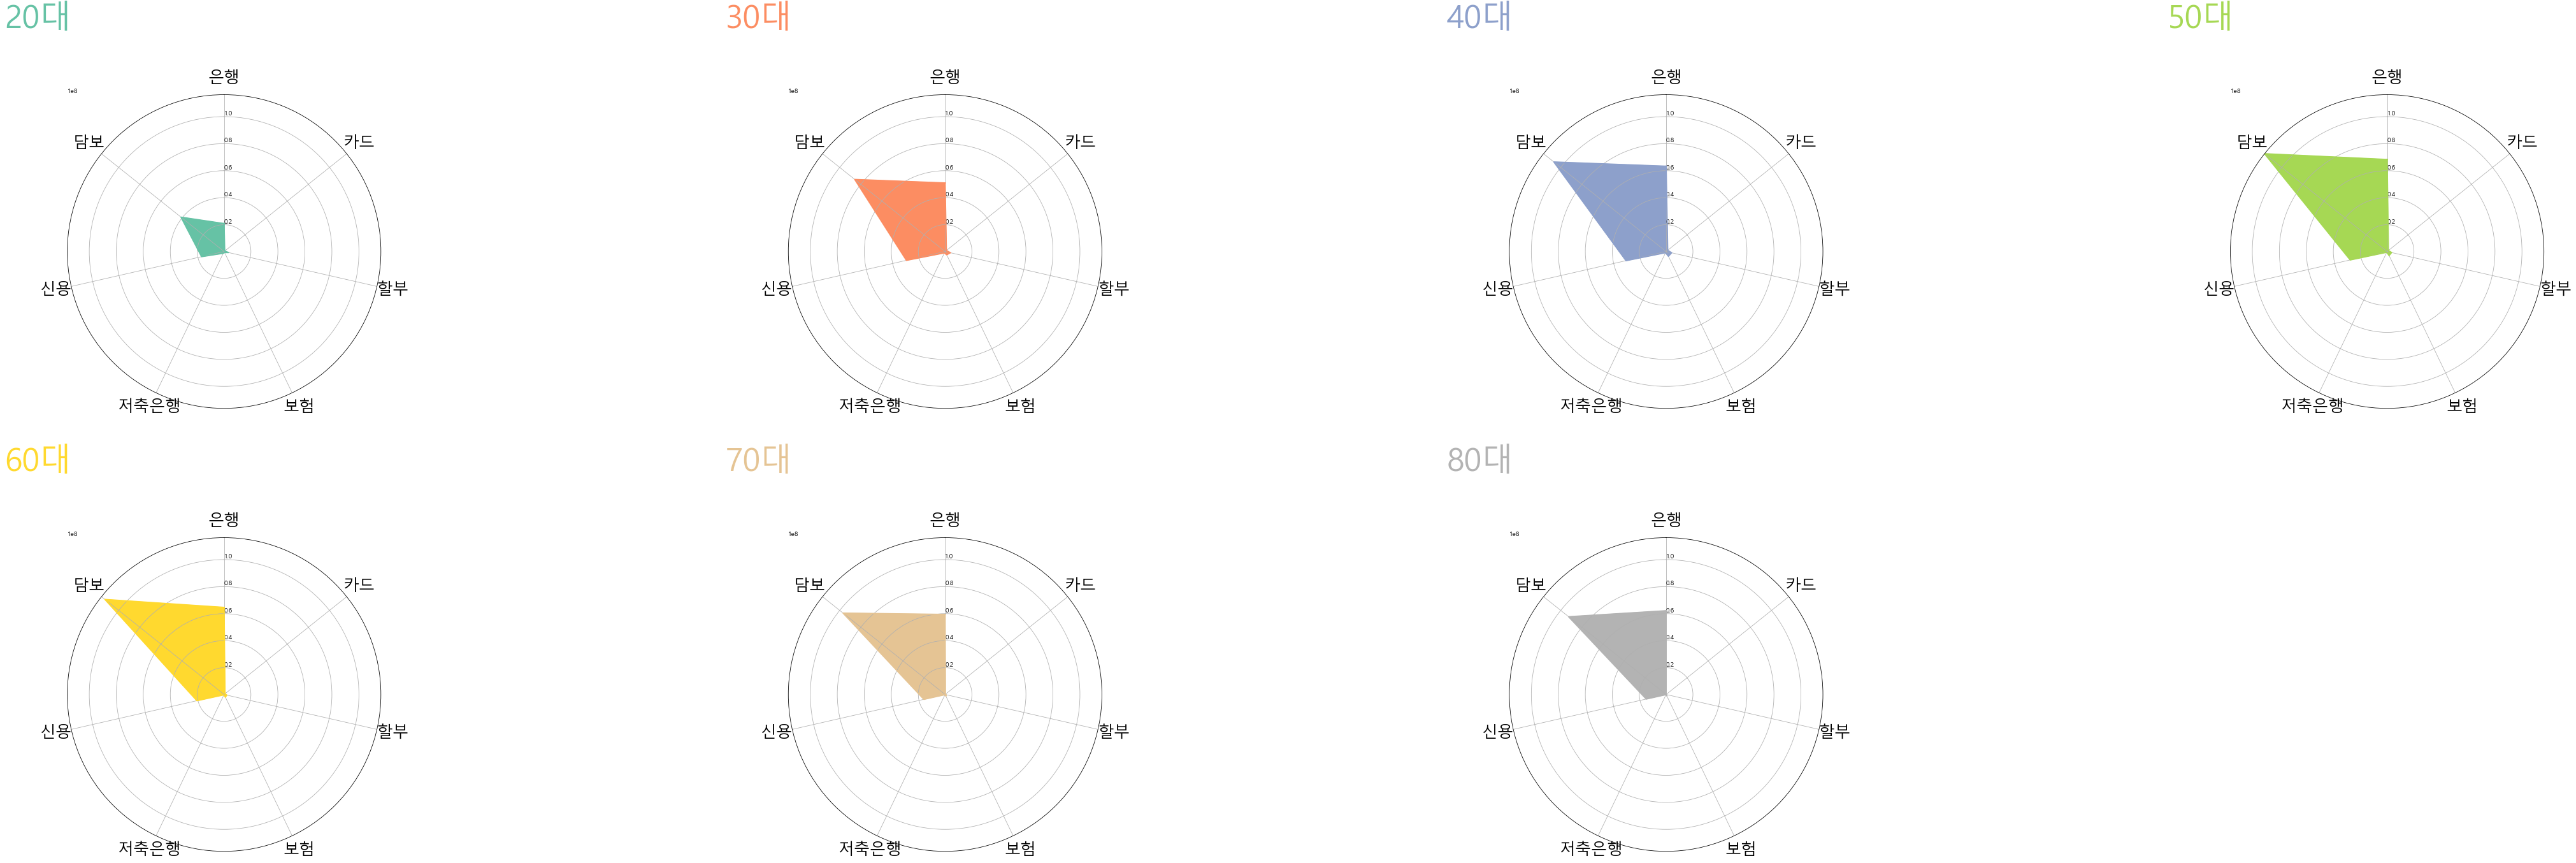

In [44]:
labels = df_loan.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*np.pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df_loan.index))
 
fig = plt.figure(figsize=(65,20))
fig.set_facecolor('white')
 
for i, row in df_loan.iterrows():
    color = my_palette(i)
    data = df_loan.iloc[i].drop('ages').tolist()
    data += data[:1]
    
    ax = plt.subplot(2,4,i+1, polar=True)
    ax.set_theta_offset(np.pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=25) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks(fontsize=10) ## y축 눈금 설정
    plt.ylim(df_loan.drop(['ages'],axis=1).min().min(),df_loan.drop(['ages'],axis=1).max().max())
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=1) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.ages, size=50, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()